# LINEAR DISCRIMINANT ANALYSIS

Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.

<b> Information of Dataset </b>

<b>Wine Dataset: </b>These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are: 
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

https://archive.ics.uci.edu/ml/datasets/wine

<b> Importing the Libaries </b>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

<b> Importing the dataset </b>

In [2]:
df = pd.read_csv('Wine.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


<b> Data Information and Visualization </b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<b> Visualize Target Class Label Distributiuon </b>

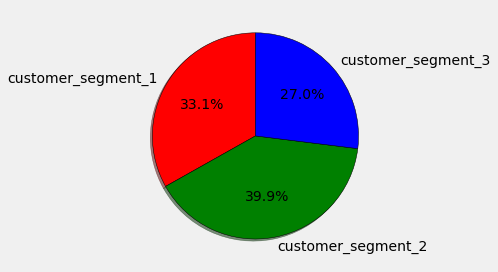

In [5]:
plt.style.use('fivethirtyeight')

seg1 = df[df['Customer_Segment'] == 1].shape[0]
seg2 = df[df['Customer_Segment'] == 2].shape[0]
seg3 = df[df['Customer_Segment'] == 3].shape[0]


class_ = [seg1, seg2, seg3]
label = ['customer_segment_1', 'customer_segment_2', 'customer_segment_3']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green', 'blue'])

plt.tight_layout()
plt.show()

<b> Data Preprocessing </b>

<b> Define Predictor and Target attributes values </b>

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Predictor Attribute

In [7]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Target Attribute

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64

In [9]:
y.unique()

array([1, 2, 3], dtype=int64)

<b> Split the data into training and testing </b>

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

Training Data

In [11]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (142, 13)
Y_train (142,)


Testing data

In [12]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (36, 13)
X_test (36,)


<b> Checking for missing values </b>

In [13]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

<b> Feature Scaling </b>

In [14]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# Feature Extraction using PCA

<b> Import LDA </b>

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

<b> Initialize the LDA </b>

In [16]:
lda = LDA(n_components = 2)

<b> Fitting a LDA Model </b>

In [17]:
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

<b> Explained the variance </b>

In [18]:
explained_varience = lda.explained_variance_ratio_
explained_varience

array([0.73931691, 0.26068309])

# Build Logistic Regression

<b> Import Model from sklearn </b>

In [19]:
from sklearn.linear_model import LogisticRegression

<b> Initialize the model </b>

In [20]:
LG = LogisticRegression(random_state=0)

<b> Fit the training data into model </b>

In [21]:
LG.fit(X_train,Y_train)

LogisticRegression(random_state=0)

<b> Predict the test model </b>

In [22]:
Y_pred=LG.predict(X_test)
Y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

# Evaluation of the Results and Visualize

<b> Confusion matrix </b>

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

<b> Visualize the result </b>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


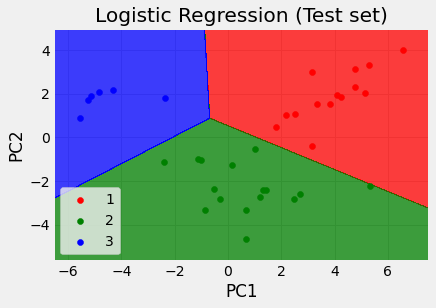

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()